# SSAM Notebook: ExSeq data SSAM analysis

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
import pickle
import numpy as np

import pandas as pd
from shapely.geometry import Point, Polygon

In [33]:
plt.rcParams["font.family"] = "Arial"

In [34]:
cell_class_colors = {
    "Lamp5": "#DA808C",
    "Sncg": "#8510C0",
    "Serpinf1": "#8510C0",
    "Vip": "#70559A",
    "Sst": "#F15A29",
    "Pvalb": "#D93137",
    "L2/3 IT": "#94D9A1",
    "L4": "#00979D",
    "L5 IT": "#008A61",
    "L6 IT": "#A19922",
    "L5 PT": "#0D5B78",
    "L5 NP": "#3E9E64",
    "L6 CT": "#69A8E6",
    "L6 PT": "#69A8E6",
    "L6b": "#266180",
    "Meis2": "#FF0000",
    "CR": "#00FF66",
    "Astro": "#665C47",
    "Oligo": "#53776C",
    "VLMC": "#697255",
    "Peri": "#665547",
    "SMC": "#807059",
    "Endo": "#8D6C62",
    "Macrophage": "#537358",    
}

In [3]:
seg_df = pd.read_csv("data/baysor/ex_seq/segmentation.csv")

In [4]:
pd.read_csv("data/raw/spottable_exseq.csv")

,FOV,PositionsPix_1,PositionsPix_2,PositionsPix_3,PositionsGlobalPix_1,PositionsGlobalPix_2,PositionsGlobalPix_3,PositionsUm_1,PositionsUm_2,PositionsUm_3,BaseCalls_1,BaseCalls_2,BaseCalls_3,BaseCalls_4,GeneName
0,0,525.394737,1400.894737,1.763158,647.105263,525.394737,1.763158,26.269737,70.044737,0.211579,3,2,2,1,Mef2c
1,0,515.787879,1439.606061,1.363636,608.393939,515.787879,1.363636,25.789394,71.980303,0.163636,2,0,2,2,Grin3a
2,0,1661.434783,1253.086957,2.130435,794.913043,1661.434783,2.130435,83.071739,62.654348,0.255652,1,0,2,1,Mpped1
3,0,1876.357143,1560.404762,2.023810,487.595238,1876.357143,2.023810,93.817857,78.020238,0.242857,1,0,2,1,Mpped1
4,0,109.921875,471.234375,2.609375,1576.765625,109.921875,2.609375,5.496094,23.561719,0.313125,2,0,2,2,Grin3a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265342,98,297.687097,762.422581,97.145161,17341.897419,20368.087097,97.145161,14.884355,38.121129,11.657419,2,2,1,3,Satb2
265343,98,84.408730,525.638889,119.900794,17578.681111,20154.808730,119.900794,4.220437,26.281944,14.388095,1,3,3,1,Rorb
265344,98,1238.582677,299.692913,124.070866,17804.627087,21308.982677,124.070866,61.929134,14.984646,14.888504,3,3,0,0,Thsd7a
265345,98,1006.573529,2006.312500,125.764706,16098.007500,21076.973529,125.764706,50.328676,100.315625,15.091765,1,1,0,0,Npas1


In [5]:
spots = pd.read_csv("data/raw/spottable_exseq.csv", usecols=["GeneName", "PositionsGlobalPix_1", "PositionsGlobalPix_2", "PositionsGlobalPix_3"]).rename(columns={"GeneName": "gene", "PositionsGlobalPix_1": "x", "PositionsGlobalPix_2": "y", "PositionsGlobalPix_3": "z"}).set_index('gene')
spots.x *= 0.05
spots.y *= 0.05
spots.z *= 0.12
spots.x -= spots.x.min()
spots.y -= spots.y.min()
spots.z -= spots.z.min()

In [6]:
spots['cell'] = seg_df['cell'].to_numpy()

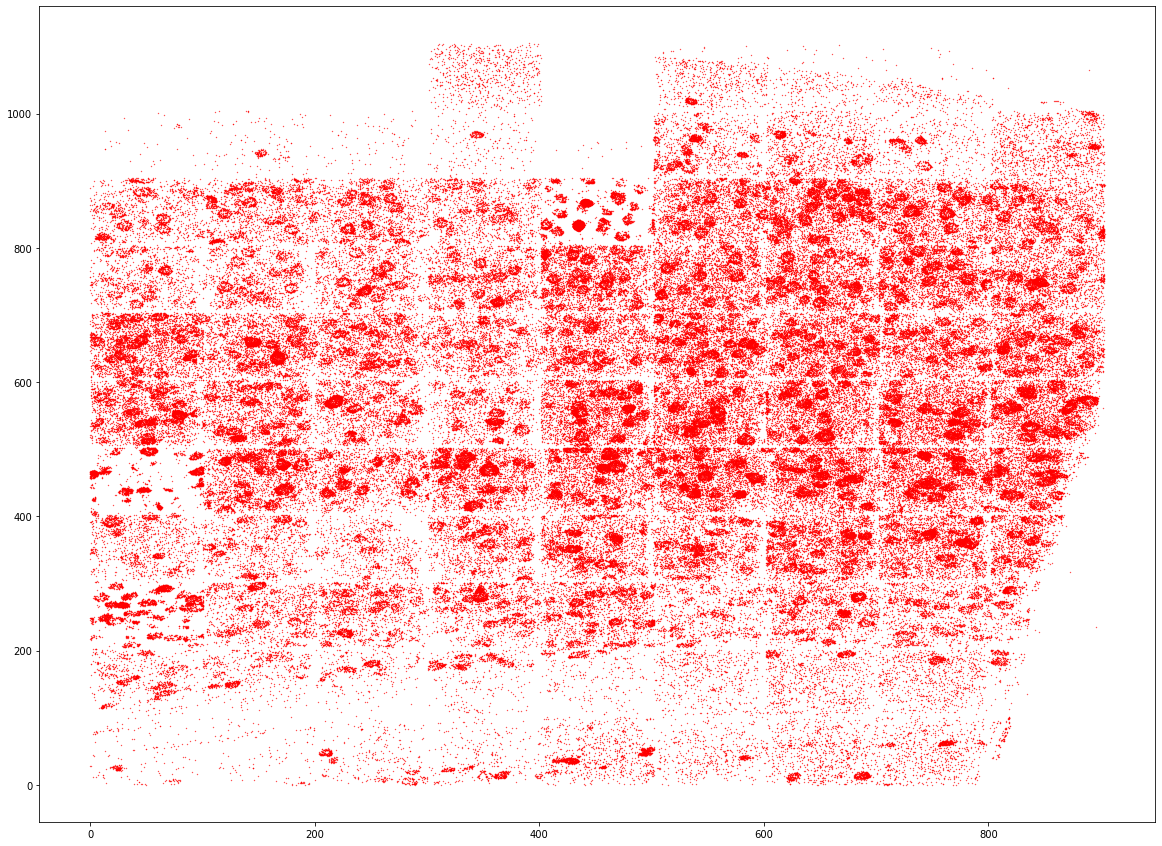

In [7]:
plt.figure(figsize=[20, 15])
plt.scatter(spots.x, spots.y, s=0.1, c="r")

In [4]:
import ssam

In [5]:
ds = ssam.SSAMDataset("ssam_data/exseq")
analysis = ssam.SSAMAnalysis(ds, ncores=10, verbose=True)

In [11]:
width = int(spots.x.max())
height = int(spots.y.max())
depth = int(spots.z.max())
analysis.run_kde(locations=spots, width=width, height=height, depth=depth, bandwidth=2.5, re_run=True)

Running KDE for gene Alcam...
Saving KDE for gene Alcam...
Running KDE for gene Ank1...
Saving KDE for gene Ank1...
Running KDE for gene Ankrd55...
Saving KDE for gene Ankrd55...
Running KDE for gene B3galt1...
Saving KDE for gene B3galt1...
Running KDE for gene Cdh9...
Saving KDE for gene Cdh9...
Running KDE for gene Chodl...
Saving KDE for gene Chodl...
Running KDE for gene Cux2...
Saving KDE for gene Cux2...
Running KDE for gene Dlx1...
Saving KDE for gene Dlx1...
Running KDE for gene Elfn1...
Saving KDE for gene Elfn1...
Running KDE for gene Fam19a2...
Saving KDE for gene Fam19a2...
Running KDE for gene Fezf2...
Saving KDE for gene Fezf2...
Running KDE for gene Foxp2...
Saving KDE for gene Foxp2...
Running KDE for gene Gad2...
Saving KDE for gene Gad2...
Running KDE for gene Galnt14...
Saving KDE for gene Galnt14...
Running KDE for gene Grin3a...
Saving KDE for gene Grin3a...
Running KDE for gene Grm5...
Saving KDE for gene Grm5...
Running KDE for gene Kcnip4...
Saving KDE for gene

In [6]:
analysis.load_kde()

In [12]:
analysis.find_localmax(search_size=3)

Found 3728 local max vectors.


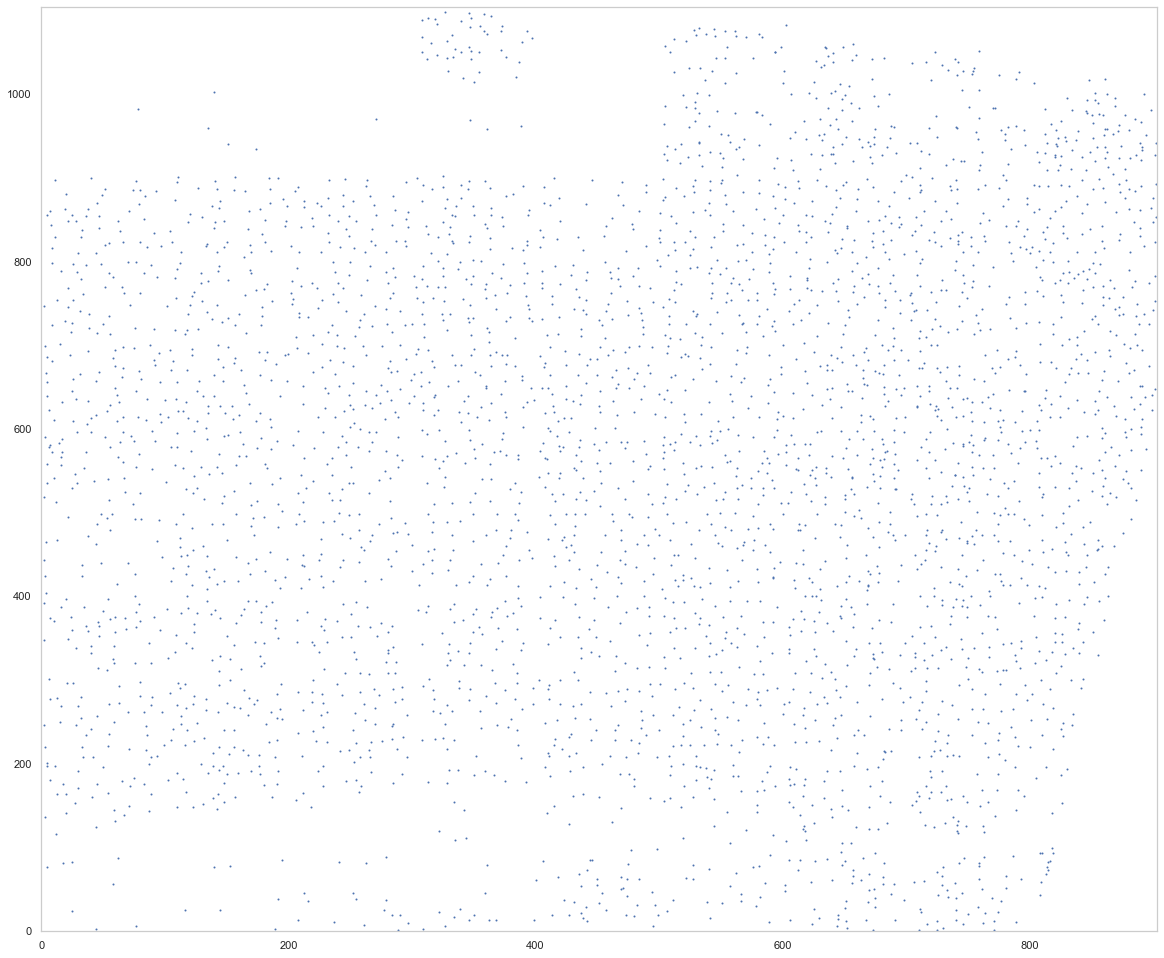

In [13]:
plt.figure(figsize=[20, 17])
ds.plot_localmax(rotate=3)

In [14]:
analysis.normalize_vectors()

Normalizing...
Processing chunk 1 (of 11)...
Processing chunk 2 (of 11)...
Processing chunk 3 (of 11)...
Processing chunk 4 (of 11)...
Processing chunk 5 (of 11)...
Processing chunk 6 (of 11)...
Processing chunk 7 (of 11)...
Processing chunk 8 (of 11)...
Processing chunk 9 (of 11)...
Processing chunk 10 (of 11)...
Processing chunk 11 (of 11)...


In [7]:
calls_nwcs = pd.read_csv("consensus_calls/renee/exSeq_filtered_combined_mapping_neg_weight_subclass.csv")

In [8]:
cell_by_gene = pd.read_csv("data/baysor/ex_seq/segmentation_counts.tsv", sep='\t').set_index('gene').T[ds.genes]

In [9]:
cell_by_gene = cell_by_gene.iloc[calls_nwcs.sample_name - 1]

In [10]:
cell_by_gene

gene,Alcam,Ank1,Ankrd55,B3galt1,Cdh9,Chodl,Cux2,Dlx1,Elfn1,Fam19a2,...,Rorb,Satb2,Sema3e,Sez6,Slc32a1,Sv2c,Syndig1,Thsd7a,Tnni3k,Unc13c
1,0,106,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2,0,4,0,0,0,0,0,1,...,1,4,7,12,0,0,6,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,3,0,0,0,0,1,0
4,1,1,0,4,1,0,0,0,1,1,...,1,3,1,6,1,0,1,0,0,0
5,6,0,0,1,0,0,12,0,0,1,...,0,6,0,2,0,1,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,0,1,0,2,0,0,0,0,0,0,...,0,1,1,4,0,0,0,0,0,0
1480,1,1,1,1,0,0,2,0,1,1,...,0,2,0,3,0,0,2,1,0,0
1484,3,0,0,0,0,0,2,0,0,3,...,2,0,0,0,0,0,2,0,0,0
1495,0,1,0,0,0,0,1,0,0,2,...,2,2,0,1,0,0,2,3,0,0


In [11]:
from sklearn.preprocessing import normalize
#cell_by_gene_normalized = ssam.run_sctransform(cell_by_gene.reset_index(drop=True), plot_model_pars=True)[0]
cell_by_gene_normalized = np.log(normalize(cell_by_gene, norm="l1", axis=1) * 10 + 1)
cell_by_gene_normalized_scaled = preprocessing.scale(cell_by_gene_normalized)

In [12]:
from collections import defaultdict
from itertools import chain

def sort_genes(centroids, tbl, genes, min_exp=0.5):
    sorted_genes = defaultdict(lambda: [])
    sorted_cnt = 0
    while sorted_cnt < len(genes):
        for cidx, mean_cl in enumerate(centroids):
            for gidx in np.argsort(mean_cl)[::-1]:
                if all([not genes[gidx] in l for l in sorted_genes.values()]):
                    if mean_cl[gidx] < min_exp:
                        sorted_genes["rem"].append(genes[gidx])
                    else:
                        sorted_genes[cidx].append(genes[gidx])
                    sorted_cnt += 1
                    break
    sorted_genes = list(chain(*[sorted_genes[i] for i in range(len(centroids))])) + sorted_genes["rem"]
    sorted_gidx = [list(genes).index(g) for g in sorted_genes]
    return tbl[:, sorted_gidx], sorted_genes

In [44]:
def plot_heatmap(sorted_cbg, sorted_genes, calls, uniq_calls, cols, figsize):
    from sklearn import preprocessing
    from mpl_toolkits.axes_grid1 import Divider, Size
    from matplotlib import patches

    rects = []
    sorted_cbg2 = np.zeros_like(sorted_cbg)
    curpos = 0
    for idx, (cell_type, col) in enumerate(zip(uniq_calls, cols)):
        cl_vecs = sorted_cbg[calls.subclass == cell_type]
        sorted_cbg2[curpos:curpos+len(cl_vecs)] = cl_vecs
        rects.append(patches.Rectangle((curpos, 0), curpos+len(cl_vecs), 1, linewidth=0, facecolor=col))
        curpos += len(cl_vecs)


    fig = plt.figure(figsize=figsize)
    #fig, axes = plt.subplots(2, 1, figsize=[20, 10], sharex=True)

    h = [Size.Fixed(1.0), Size.Scaled(1.0)]
    v = [Size.Fixed(0), Size.Scaled(1.0), Size.Fixed(0.05), Size.Fixed(0.3)]
    divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)

    ax_heatmap = fig.add_axes(divider.get_position(), axes_locator=divider.new_locator(nx=1, ny=1))
    ax_ctbar = fig.add_axes(divider.get_position(), axes_locator=divider.new_locator(nx=1, ny=3), sharex=ax_heatmap)

    for rect in rects:
        ax_ctbar.add_patch(rect)

    ax_ctbar.axes.xaxis.set_visible(False)
    ax_ctbar.axes.yaxis.set_visible(False)
    for sp in ax_ctbar.spines.values():
        sp.set_linewidth(0.5)
        sp.set_color('k')

    sns.heatmap(sorted_cbg2.T[::-1, :], vmin=-2.5, vmax=2.5, cmap='bwr', yticklabels=sorted_genes[::-1],
                cbar=None, ax=ax_heatmap)
    ax_heatmap.axes.xaxis.set_visible(False)
    for tick in ax_heatmap.get_yticklabels():
        tick.set_fontname("Arial")
    for sp in ax_heatmap.spines.values():
        sp.set_linewidth(0.5)
        sp.set_color('k')
        sp.set_visible(True)
    plt.yticks(rotation=0)

    #ax_hist = fig.add_axes([1.02, 0.74, 0.08, 0.1])
    #ax_hist.hist(np.ravel(sorted_cbg2), bins=100, histtype='step', lw=3, color='lime')
    #ax_hist.set_xlim([-2.5, 2.5])
    #ax_hist.axes.xaxis.set_ticks([-2.5, 0, 2.5])
    #ax_hist.axes.yaxis.set_visible(False)

    return fig

In [45]:
uniq_celltypes_nwcs = [cl for cl in cell_class_colors.keys() if cl in calls_nwcs.subclass.unique()]
centroids_nwcs = []
for cell_type in uniq_celltypes_nwcs:
    centroids_nwcs.append(np.mean(cell_by_gene_normalized[calls_nwcs.subclass == cell_type], axis=0))

In [46]:
centroids_scaled_nwcs = []
for cell_type in uniq_celltypes_nwcs:
    centroids_scaled_nwcs.append(np.mean(cell_by_gene_normalized_scaled[calls_nwcs.subclass == cell_type], axis=0))
    
sorted_cbg, sorted_genes = sort_genes(centroids_scaled_nwcs, cell_by_gene_normalized_scaled, ds.genes)

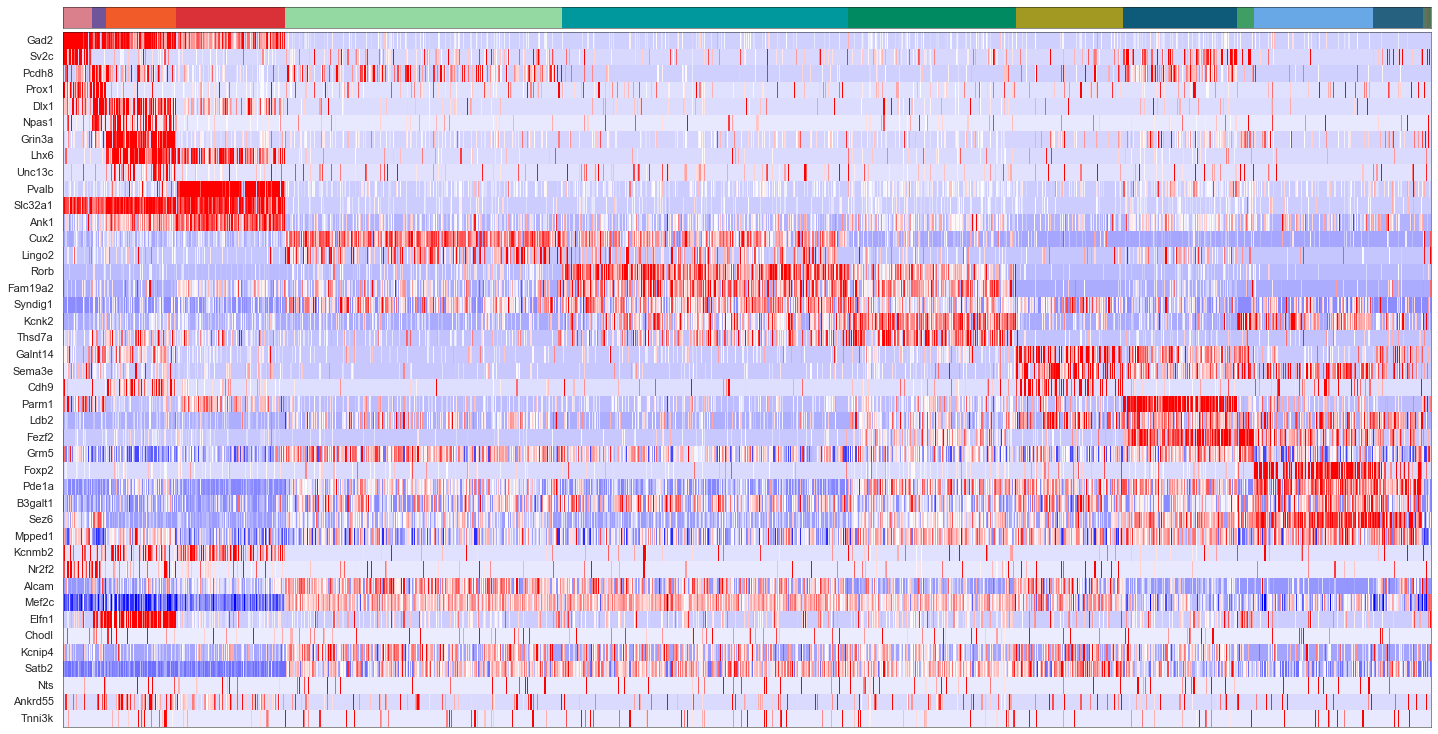

In [47]:
cols = [cell_class_colors[ct] for ct in uniq_celltypes_nwcs]
plot_heatmap(sorted_cbg[:, ::-1], sorted_genes[::-1], calls_nwcs, uniq_celltypes_nwcs, cols, [20, 10]).savefig("exseq_heatmap_nwcs.pdf")

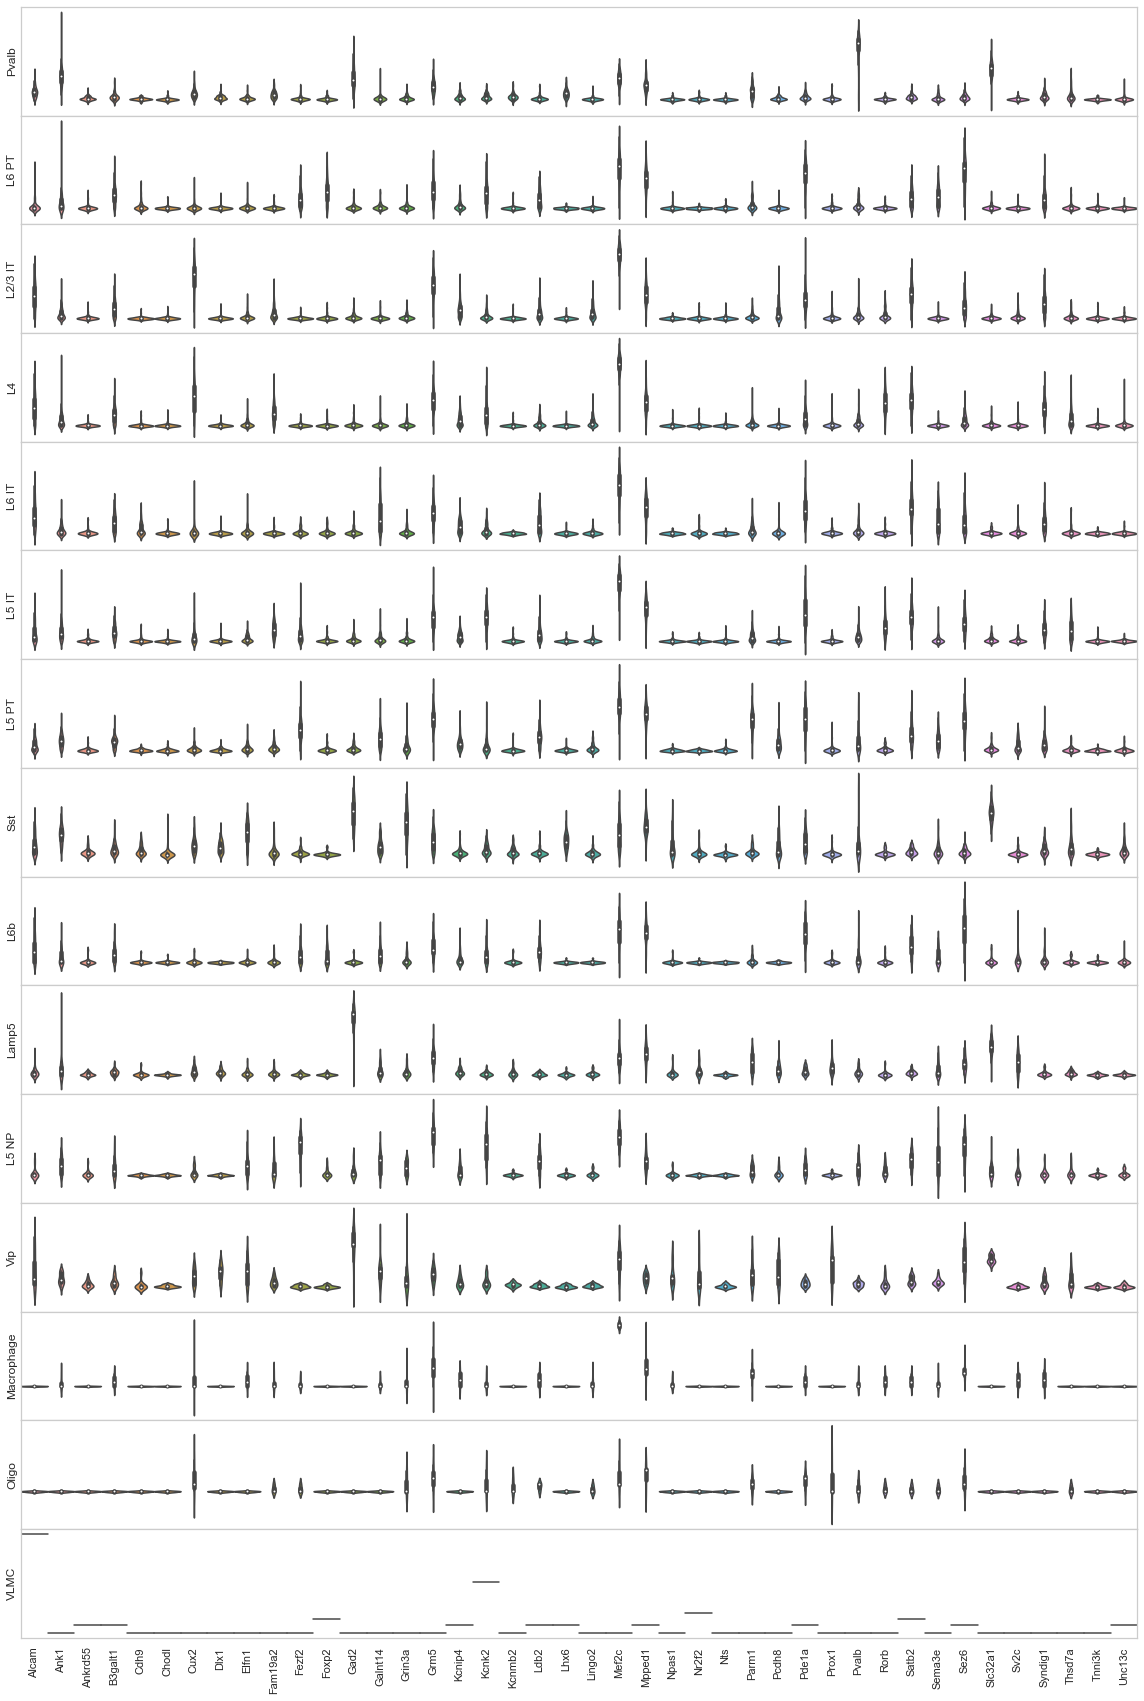

In [12]:
from sklearn import preprocessing
fig, axes = plt.subplots(len(uniq_celltypes_nwcs), 1, figsize=[20, len(uniq_celltypes_nwcs)*2])
plt.subplots_adjust(hspace=0)
for idx, cell_type in enumerate(uniq_celltypes_nwcs):
    cl_vecs = cell_by_gene_normalized_scaled[calls_nwcs.subclass == cell_type]
    if len(cl_vecs) == 1:
        cl_vecs = np.array([cl_vecs[0], cl_vecs[0]])
    sns.violinplot(ax=axes[idx], data=cl_vecs, width=1)
    axes[idx].set_ylabel(cell_type)
    axes[idx].set_yticks([])
axes[idx].set_xticklabels(ds.genes, rotation=90)
pass

In [22]:
analysis.map_celltypes(centroids_nwcs)

Generating cell-type map for centroid #0...
Processing chunk (0/6)...
Processing chunk (1/6)...
Processing chunk (2/6)...
Processing chunk (3/6)...
Processing chunk (4/6)...
Processing chunk (5/6)...
Generating cell-type map for centroid #1...
Processing chunk (0/6)...
Processing chunk (1/6)...
Processing chunk (2/6)...
Processing chunk (3/6)...
Processing chunk (4/6)...
Processing chunk (5/6)...
Generating cell-type map for centroid #2...
Processing chunk (0/6)...
Processing chunk (1/6)...
Processing chunk (2/6)...
Processing chunk (3/6)...
Processing chunk (4/6)...
Processing chunk (5/6)...
Generating cell-type map for centroid #3...
Processing chunk (0/6)...
Processing chunk (1/6)...
Processing chunk (2/6)...
Processing chunk (3/6)...
Processing chunk (4/6)...
Processing chunk (5/6)...
Generating cell-type map for centroid #4...
Processing chunk (0/6)...
Processing chunk (1/6)...
Processing chunk (2/6)...
Processing chunk (3/6)...
Processing chunk (4/6)...
Processing chunk (5/6)...


In [23]:
analysis.filter_celltypemaps(min_norm=0.05, min_r=0.6)

In [24]:
ds.centroids = centroids_nwcs # TODO: this should not be necessary!

In [25]:
analysis.bin_celltypemaps(step=10, radius=100)

In [26]:
analysis.find_domains(n_clusters=20, merge_remote=False, merge_thres=0.8, norm_thres=4000)

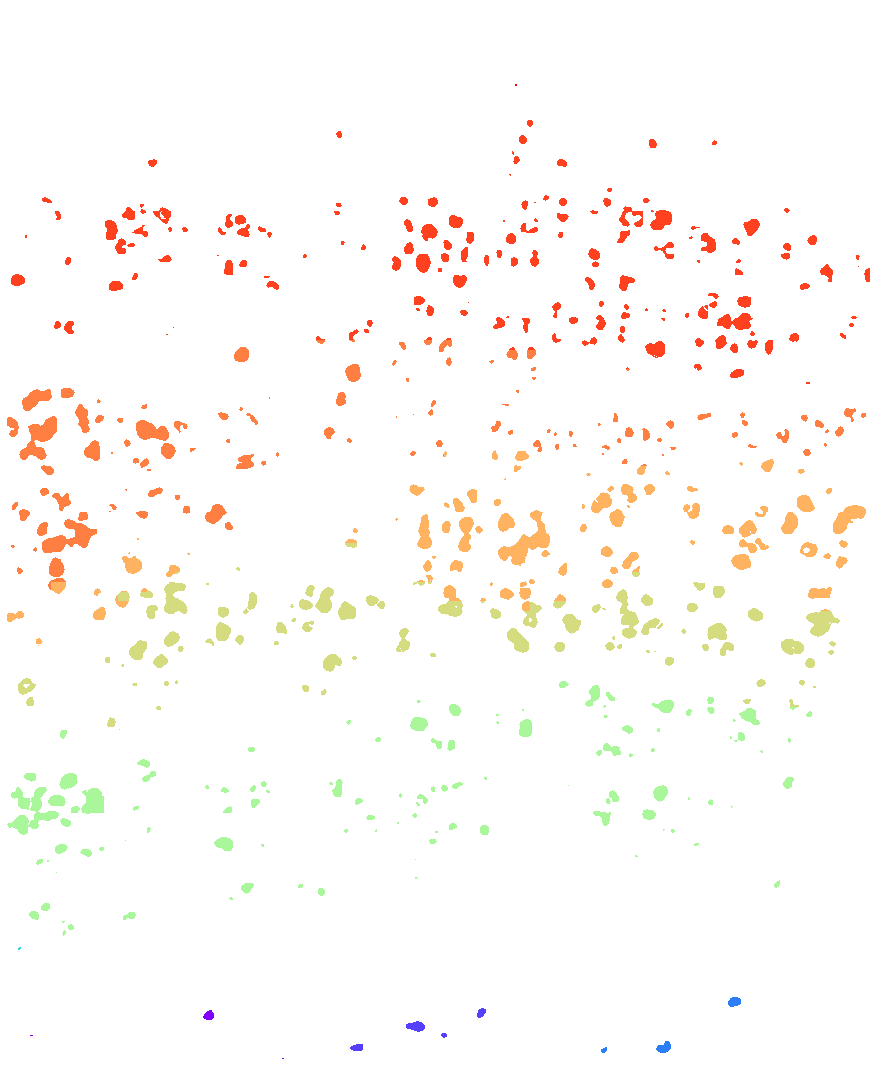

In [27]:
plt.figure(figsize=[15, 15])
ds.plot_domains(rotate=3, cmap='rainbow', z=0)
plt.axis('off')
plt.tight_layout()

In [28]:
layer_annotations = ds.inferred_domains[ds.local_maxs]

In [24]:
# TODO: implement this in SSAM!
ctmap_topview = np.zeros([ds.filtered_celltype_maps.shape[0], ds.filtered_celltype_maps.shape[1], 1], dtype=int) - 1
for z in range(ds.filtered_celltype_maps.shape[-1]):
    m = ds.filtered_celltype_maps[..., z] > -1
    ctmap_topview[m, 0] = ds.filtered_celltype_maps[..., z][m]
ds.filtered_celltype_maps = ctmap_topview

In [25]:
map_colors_nwcs = [cell_class_colors[ct] for ct in uniq_celltypes_nwcs]

Text(0.5, 1.0, 'ExSeq - NWCS (SSAM)')

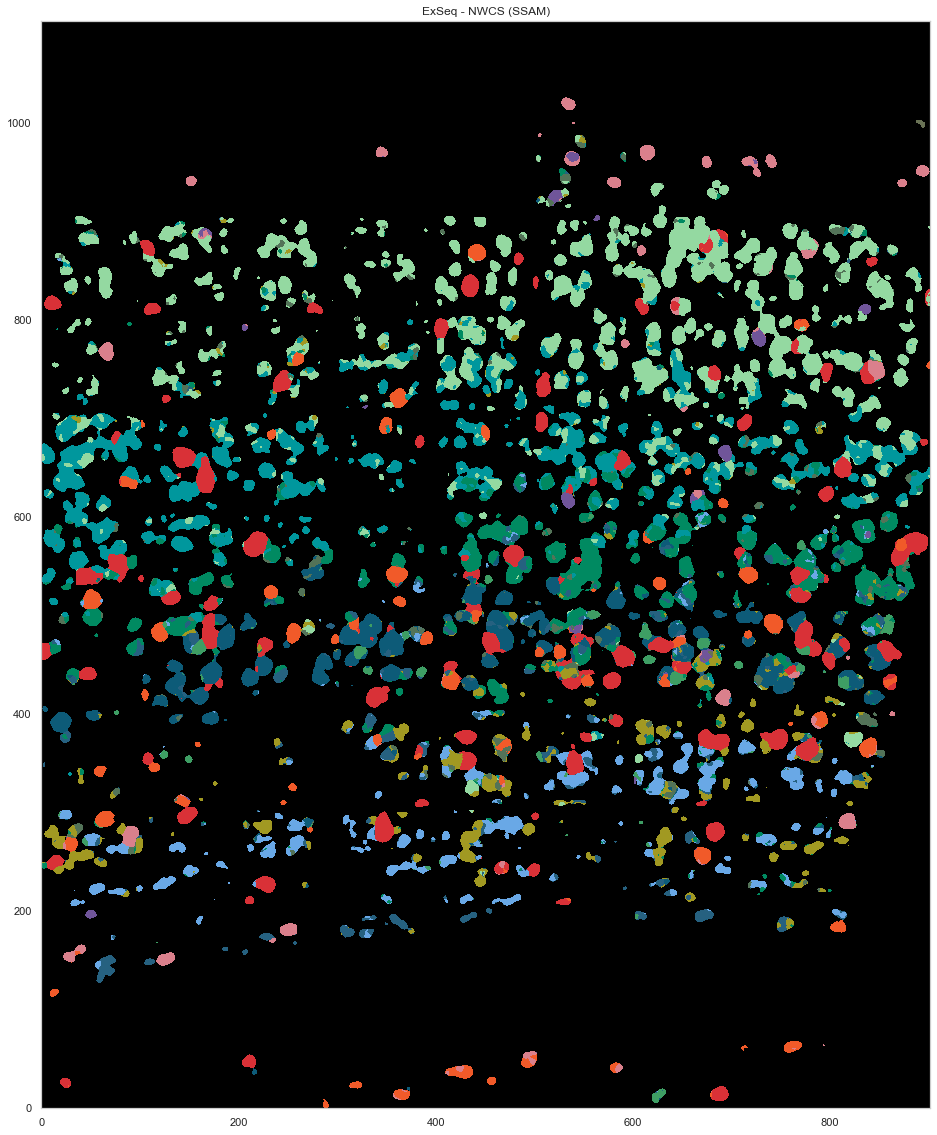

In [27]:
plt.figure(figsize=[20, 20])
ds.plot_celltypes_map(rotate=3, z=0, colors=map_colors_nwcs)
plt.title("ExSeq - NWCS (SSAM)")

In [39]:
calls_gmcs = pd.read_csv("consensus_calls/charles/exseq_jeremy_pciseq_renee_eeshit_consensus_df.csv")

In [40]:
for cl in calls_gmcs.subclass.unique():
    if cl == "L23_IT":
        calls_gmcs.subclass.loc[calls_gmcs.subclass == "L23_IT"] = "L2/3 IT"
    elif "_" in cl:
        calls_gmcs.subclass.loc[calls_gmcs.subclass == cl] = cl.replace("_", " ")

/tmp/ipykernel_263/1845947111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_gmcs.subclass.loc[calls_gmcs.subclass == cl] = cl.replace("_", " ")
/tmp/ipykernel_263/1845947111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_gmcs.subclass.loc[calls_gmcs.subclass == "L23_IT"] = "L2/3 IT"


In [48]:
uniq_celltypes_gmcs = [cl for cl in cell_class_colors.keys() if cl in calls_gmcs.subclass.unique()]
centroids_gmcs = []
for cell_type in uniq_celltypes_gmcs:
    centroids_gmcs.append(np.mean(cell_by_gene_normalized[calls_gmcs.subclass == cell_type], axis=0))

In [49]:
centroids_scaled_gmcs = []
for cell_type in uniq_celltypes_gmcs:
    centroids_scaled_gmcs.append(np.mean(cell_by_gene_normalized_scaled[calls_gmcs.subclass == cell_type], axis=0))
    
sorted_cbg, sorted_genes = sort_genes(centroids_scaled_gmcs, cell_by_gene_normalized_scaled, ds.genes)

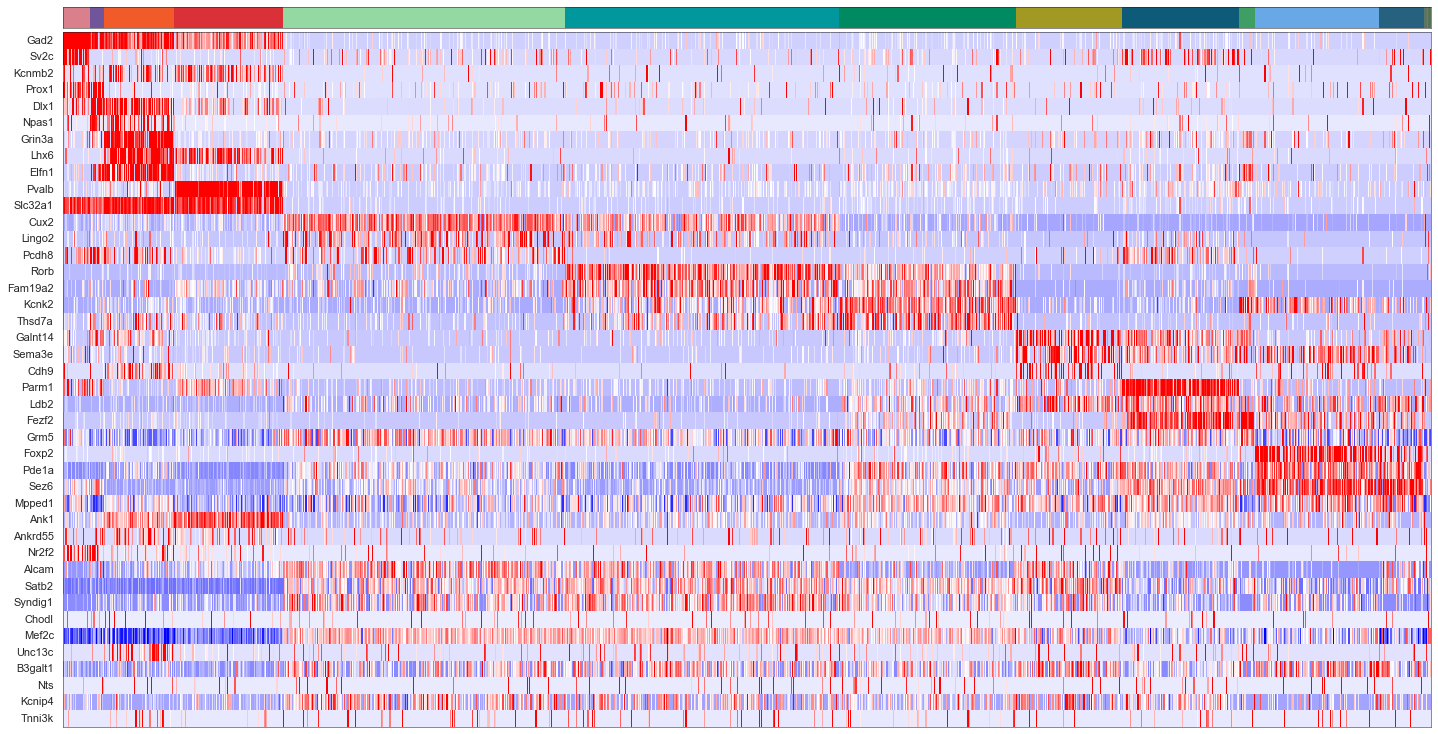

In [50]:
cols = [cell_class_colors[ct] for ct in uniq_celltypes_gmcs]
plot_heatmap(sorted_cbg[:, ::-1], sorted_genes[::-1], calls_gmcs, uniq_celltypes_gmcs, cols, [20, 10]).savefig("exseq_heatmap_gmcs.pdf")

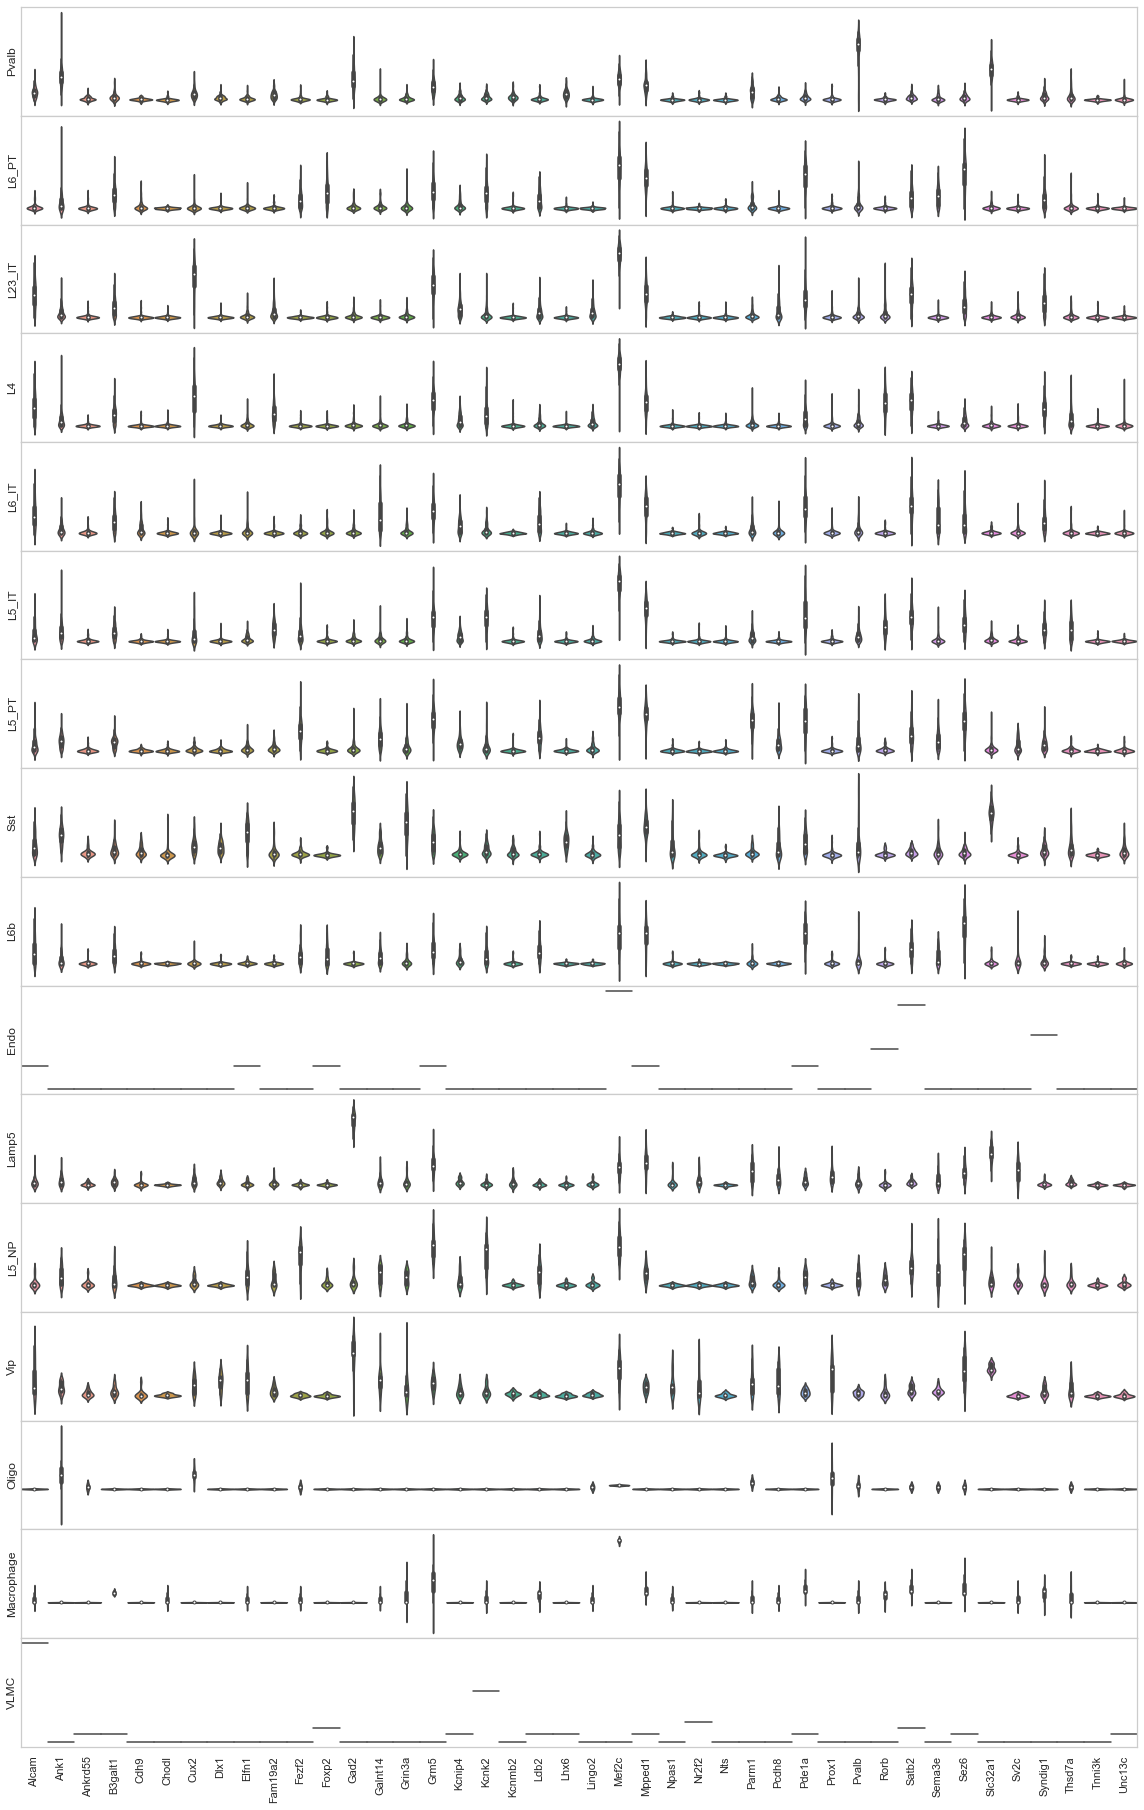

In [15]:
from sklearn import preprocessing
fig, axes = plt.subplots(len(uniq_celltypes_gmcs), 1, figsize=[20, len(uniq_celltypes_gmcs)*2])
plt.subplots_adjust(hspace=0)
for idx, cell_type in enumerate(uniq_celltypes_gmcs):
    cl_vecs = cell_by_gene_normalized_scaled[calls_gmcs.subclass == cell_type]
    if len(cl_vecs) == 1:
        cl_vecs = np.array([cl_vecs[0], cl_vecs[0]])
    sns.violinplot(ax=axes[idx], data=cl_vecs, width=1)
    axes[idx].set_ylabel(cell_type)
    axes[idx].set_yticks([])
axes[idx].set_xticklabels(ds.genes, rotation=90)
pass

In [30]:
analysis.map_celltypes(centroids_gmcs)

Generating cell-type map for centroid #0...
Processing chunk (0/6)...
Processing chunk (1/6)...
Processing chunk (2/6)...
Processing chunk (3/6)...
Processing chunk (4/6)...
Processing chunk (5/6)...
Generating cell-type map for centroid #1...
Processing chunk (0/6)...
Processing chunk (1/6)...
Processing chunk (2/6)...
Processing chunk (3/6)...
Processing chunk (4/6)...
Processing chunk (5/6)...
Generating cell-type map for centroid #2...
Processing chunk (0/6)...
Processing chunk (1/6)...
Processing chunk (2/6)...
Processing chunk (3/6)...
Processing chunk (4/6)...
Processing chunk (5/6)...
Generating cell-type map for centroid #3...
Processing chunk (0/6)...
Processing chunk (1/6)...
Processing chunk (2/6)...
Processing chunk (3/6)...
Processing chunk (4/6)...
Processing chunk (5/6)...
Generating cell-type map for centroid #4...
Processing chunk (0/6)...
Processing chunk (1/6)...
Processing chunk (2/6)...
Processing chunk (3/6)...
Processing chunk (4/6)...
Processing chunk (5/6)...


In [31]:
analysis.filter_celltypemaps(min_norm=0.05, min_r=0.6)

In [32]:
# TODO: implement this in SSAM!
ctmap_topview = np.zeros([ds.filtered_celltype_maps.shape[0], ds.filtered_celltype_maps.shape[1], 1], dtype=int) - 1
for z in range(ds.filtered_celltype_maps.shape[-1]):
    m = ds.filtered_celltype_maps[..., z] > -1
    ctmap_topview[m, 0] = ds.filtered_celltype_maps[..., z][m]
ds.filtered_celltype_maps = ctmap_topview

In [33]:
map_colors_gmcs = [cell_class_colors[ct.replace("_", " ").replace("L23", "L2/3")] for ct in uniq_celltypes_gmcs]

Text(0.5, 1.0, 'ExSeq - GMCS (SSAM)')

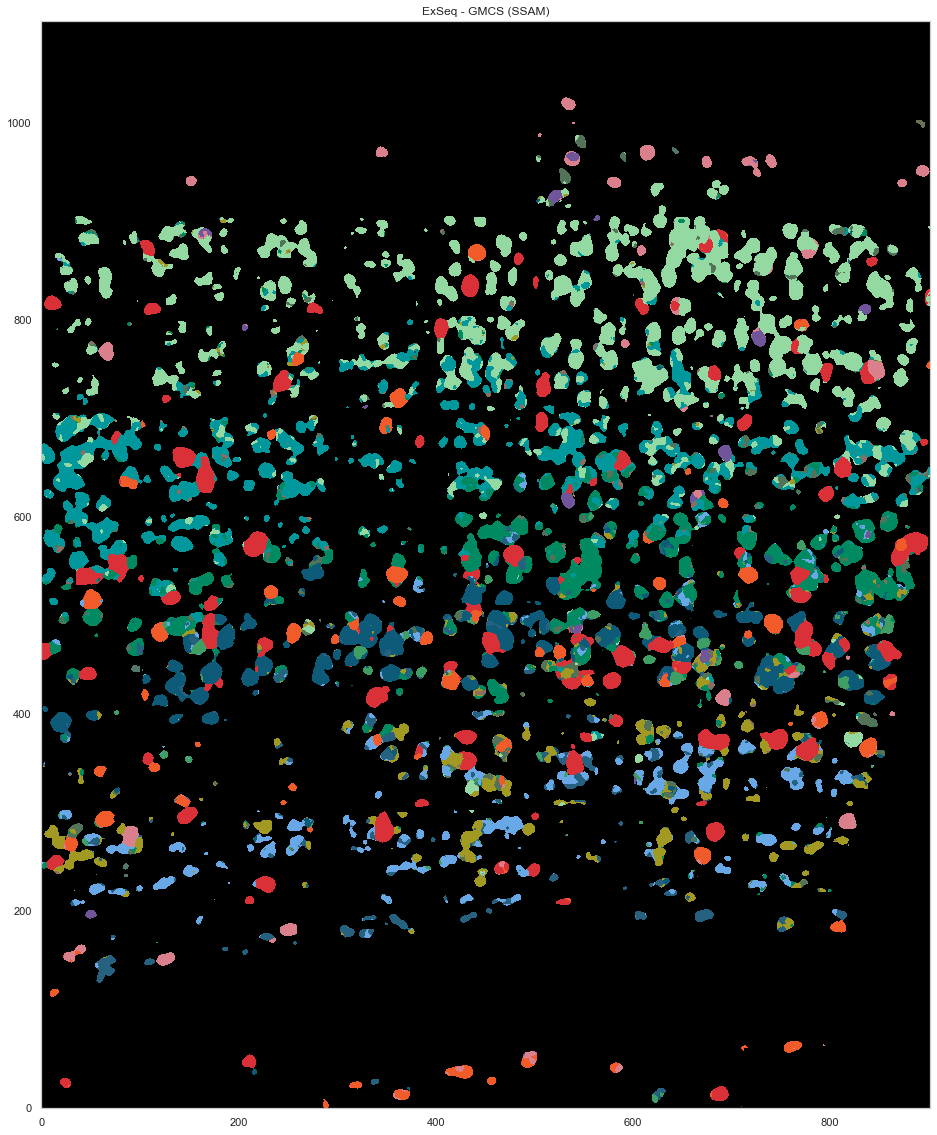

In [35]:
plt.figure(figsize=[20, 20])
ds.plot_celltypes_map(rotate=3, z=0, colors=map_colors_gmcs)
plt.title("ExSeq - GMCS (SSAM)")

In [31]:
closest_nwcs_clusters = []
closest_nwcs_clusters_r = []
closest_gmcs_clusters = []
closest_gmcs_clusters_r = []
for v in ds.normalized_vectors:
    corrs = [ssam.utils.corr(v, centroids_nwcs[i]) for i in range(len(centroids_nwcs))]
    idx = np.argmax(corrs)
    closest_nwcs_clusters.append(uniq_celltypes_nwcs[idx])
    closest_nwcs_clusters_r.append(corrs[idx])
    
    corrs = [ssam.utils.corr(v, centroids_gmcs[i]) for i in range(len(centroids_gmcs))]
    idx = np.argmax(corrs)
    closest_gmcs_clusters.append(uniq_celltypes_gmcs[idx])
    closest_gmcs_clusters_r.append(corrs[idx])
    
df = pd.DataFrame(ds.normalized_vectors, columns=ds.genes)
df.to_csv("exseq_ssam_localmax_expression.csv")

df = pd.DataFrame()
df['x'] = ds.local_maxs[0]
df['y'] = ds.local_maxs[1]
df['closest_consensus_nwcs_cluster'] = closest_nwcs_clusters
df['closest_consensus_nwcs_cluster_r'] = closest_nwcs_clusters_r
df['closest_consensus_gmcs_cluster'] = closest_gmcs_clusters
df['closest_consensus_gmcs_cluster_r'] = closest_gmcs_clusters_r
df['layer_annotations_nwcs'] = layer_annotations

df.to_csv("exseq_ssam_localmax_metadata_with_layer.csv")

Text(0.5, 1.0, 'ExSeq - NWCS')

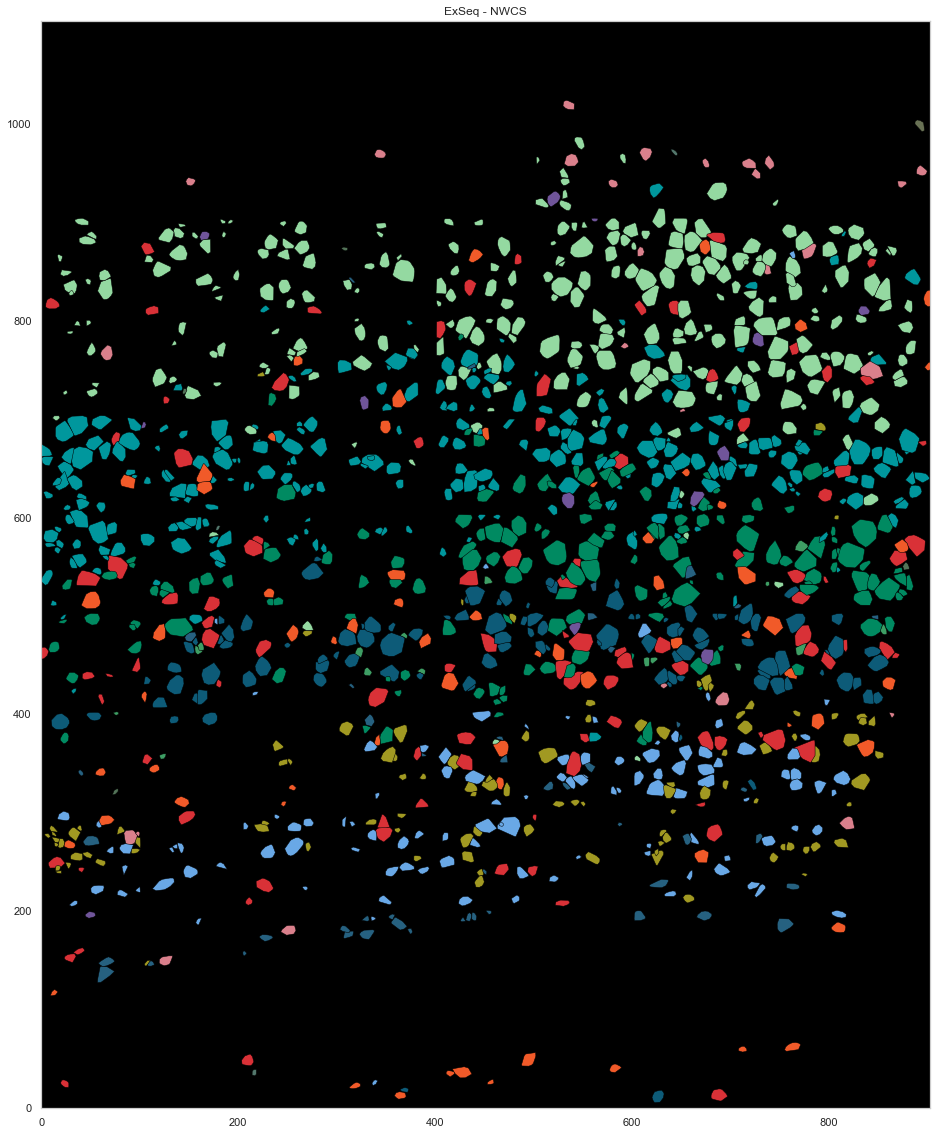

In [329]:
from scipy.spatial import ConvexHull

plt.figure(figsize=[20, 20])
plt.gca().set_facecolor('black')
good_ids = cell_by_gene.index.astype(int)
i = 0
for cid, sdf in spots.groupby("cell"):
    if cid in good_ids:
        points = sdf.iloc[:, :2].to_numpy()
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], cell_class_colors[calls_nwcs.subclass[i]], edgecolor="black", linewidth=0.5)
        i += 1
plt.xlim([0, ds.shape[0]])
plt.ylim([0, ds.shape[1]])
plt.gca().set_aspect('equal', adjustable='box')

plt.title("ExSeq - NWCS")

Text(0.5, 1.0, 'ExSeq - GMCS')

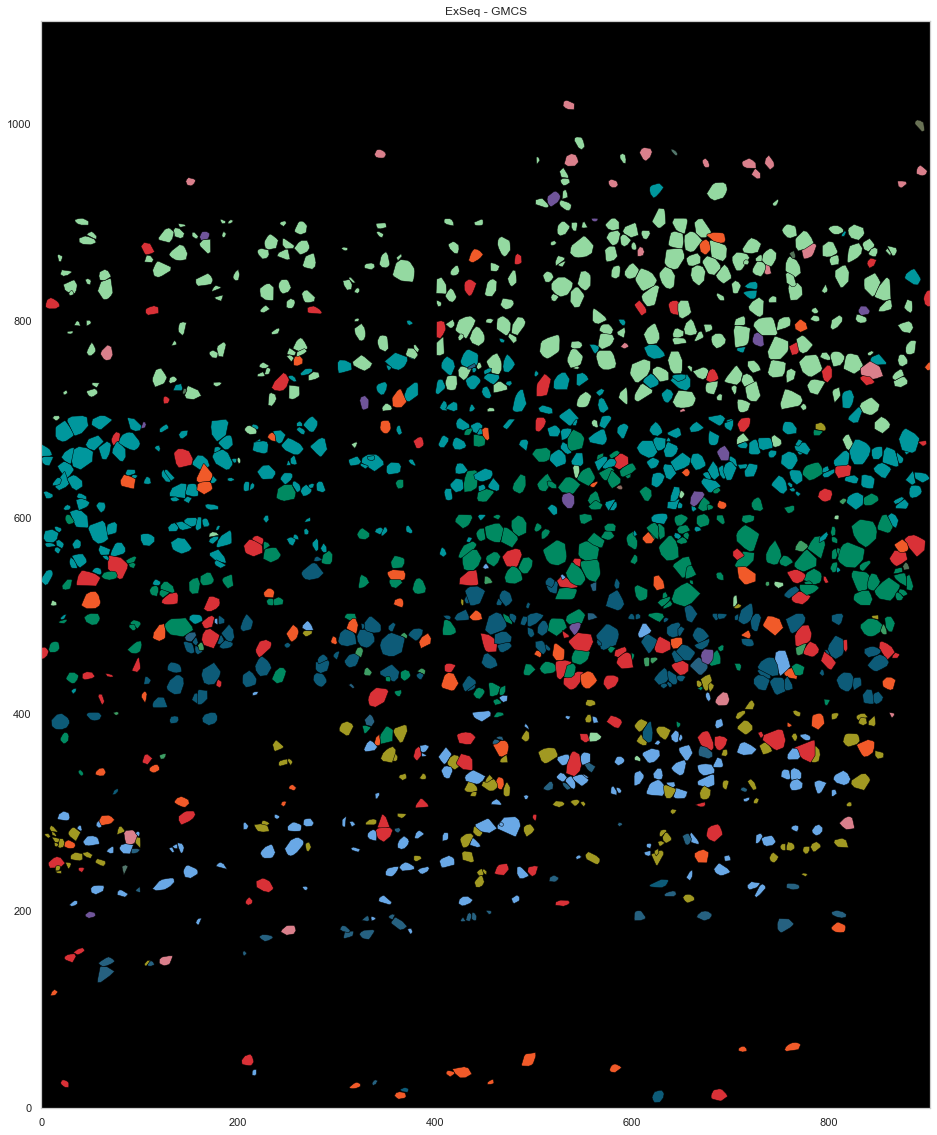

In [328]:
from scipy.spatial import ConvexHull

plt.figure(figsize=[20, 20])
plt.gca().set_facecolor('black')
good_ids = cell_by_gene.index.astype(int)
i = 0
for cid, sdf in spots.groupby("cell"):
    if cid in good_ids:
        points = sdf.iloc[:, :2].to_numpy()
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], cell_class_colors[calls_gmcs.subclass[i].replace("_", " ").replace("L23", "L2/3")], edgecolor="black", linewidth=0.5)
        i += 1
plt.xlim([0, ds.shape[0]])
plt.ylim([0, ds.shape[1]])
plt.gca().set_aspect('equal', adjustable='box')

plt.title("ExSeq - GMCS")